Demo Atelier Python pour le Club!

In [242]:
# On importe les libraires nécessaires

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed
from tabulate import tabulate

plt.style.use("seaborn-v0_8-darkgrid")

In [243]:
# On télécharge les données de plusieurs actions technologiques sur 5 ans

tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "NVDA", "ORCL"]
data = yf.download(tickers, start="2020-01-01")["Close"] #type: ignore

# On regarde les 5 premières lignes
data.head()

/var/folders/v3/798pb8p1633962lqdylbcx0r0000gn/T/ipykernel_13644/717416346.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01")["Close"] #type: ignore
[*********************100%***********************]  6 of 6 completed


Ticker,AAPL,AMZN,GOOG,MSFT,NVDA,ORCL
Date,,,,,,
2020-01-02,72.538513,94.900497,67.903816,152.791107,5.971410,49.451618
2020-01-03,71.833290,93.748497,67.570580,150.888580,5.875831,49.277458
2020-01-06,72.405678,95.143997,69.236702,151.278595,5.900473,49.534103
2020-01-07,72.065163,95.343002,69.193497,149.899277,5.971908,49.644104
2020-01-08,73.224403,94.598503,69.738770,152.286972,5.983109,49.837448


<Figure size 1000x500 with 0 Axes>

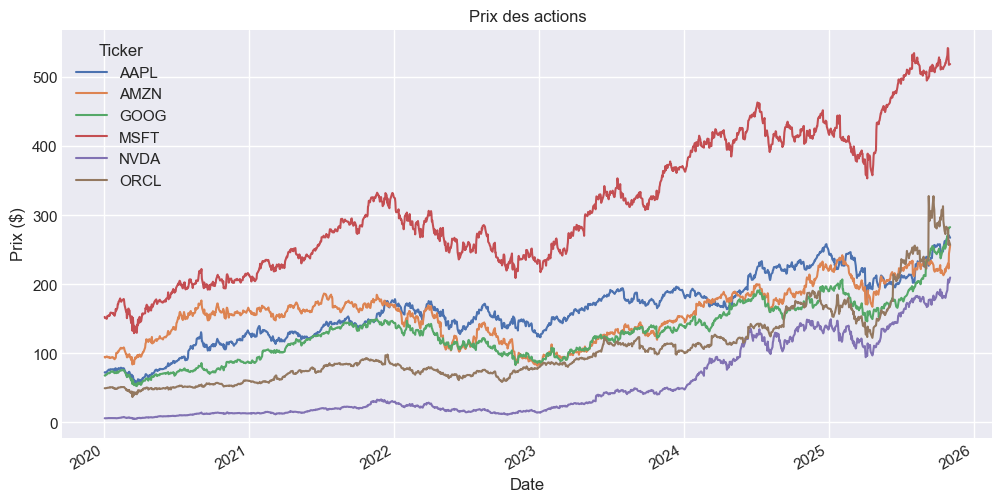

In [ ]:
# On trace les prix des actions au fil du temps

data.plot(title="Prix des actions", figsize=(12, 6))
plt.ylabel("Prix ($)")
plt.show()

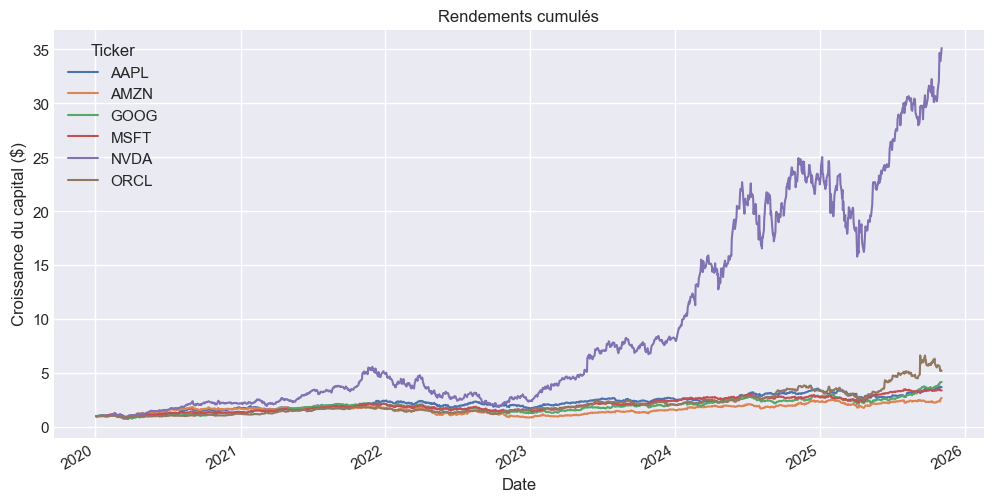

In [245]:
# On calcule et trace les rendements cumulés

returns = data.pct_change().dropna()
cumulative_returns = (1 + returns).cumprod()

cumulative_returns.plot(figsize=(12, 6), title="Rendements cumulés")
plt.ylabel("Croissance du capital ($)")
plt.show()

In [246]:
# Calcul des métriques de performance

trading_days = 252
returns_derniere_annee = returns.last("365D") #type: ignore

metrics = pd.DataFrame(index=tickers)
metrics["Rendement annualisé"] = ((1 + returns_derniere_annee.mean() * trading_days) - 1)
metrics["Volatilité annualisée"] = returns_derniere_annee.std() * np.sqrt(trading_days)
metrics["Sharpe Ratio"] = (
    metrics["Rendement annualisé"] / metrics["Volatilité annualisée"]
)

# Ratio de Sortino (rendement / volatilité négative)
downside_std = returns[returns < 0].std() * np.sqrt(trading_days)
metrics["Sortino Ratio"] = metrics["Rendement annualisé"] / downside_std

print(tabulate(metrics, headers="keys", tablefmt="fancy_grid", floatfmt=".4f")) #type: ignore

╒══════╤═══════════════════════╤═════════════════════════╤════════════════╤═════════════════╕
│      │   Rendement annualisé │   Volatilité annualisée │   Sharpe Ratio │   Sortino Ratio │
╞══════╪═══════════════════════╪═════════════════════════╪════════════════╪═════════════════╡
│ AAPL │                0.2406 │                  0.3266 │         0.7365 │          1.0578 │
├──────┼───────────────────────┼─────────────────────────┼────────────────┼─────────────────┤
│ MSFT │                0.2729 │                  0.2419 │         1.1279 │          1.2803 │
├──────┼───────────────────────┼─────────────────────────┼────────────────┼─────────────────┤
│ GOOG │                0.5534 │                  0.3224 │         1.7164 │          2.3970 │
├──────┼───────────────────────┼─────────────────────────┼────────────────┼─────────────────┤
│ AMZN │                0.3208 │                  0.3513 │         0.9132 │          1.3082 │
├──────┼───────────────────────┼─────────────────────────┼──

/var/folders/v3/798pb8p1633962lqdylbcx0r0000gn/T/ipykernel_13644/1627258495.py:4: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  returns_derniere_annee = returns.last("365D") #type: ignore


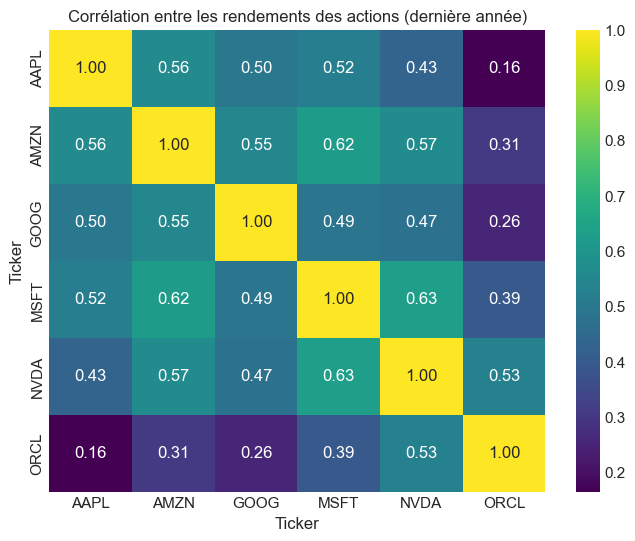

In [247]:
# On calcule et trace la matrice de corrélation des rendements

corr = returns_derniere_annee.corr() #type: ignore

plt.style.use("seaborn-v0_8-dark")

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="viridis", annot=True, fmt=".2f")
plt.title("Corrélation entre les rendements des actions (dernière année)")
plt.show()

In [251]:
asset = "MSFT"  # choisir le titre à étudier


def interactive_plot(data=[],window=100, fill=False):
    ma = data[asset].rolling(window).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(data[asset], label=f"Prix de {asset}", color="gray", alpha=0.6)
    plt.plot(ma, label=f"MM {window} jours", color="blue", alpha=0.7)

    if fill : 
        trend_up = ma < data[asset]  # True = tendance haussière
        # Colorer les zones de tendance
        plt.fill_between(data.index, data[asset].min(), data[asset].max(),
                        where=trend_up, color="green", alpha=0.05, label="Tendance haussière")
        plt.fill_between(data.index, data[asset].min(), data[asset].max(),
                        where=~trend_up, color="red", alpha=0.05, label="Tendance baissière")

    plt.title(f"Tendance du titre {asset} (Moyennes mobiles {window})")
    plt.ylabel("Prix ($)")
    plt.legend()
    plt.show()

interact(interactive_plot, data=fixed(data), window=(1, 100), fill=[False, True])

interactive(children=(IntSlider(value=100, description='window', min=1), Dropdown(description='fill', options=…

<function __main__.interactive_plot(data=[], window=100, fill=False)>

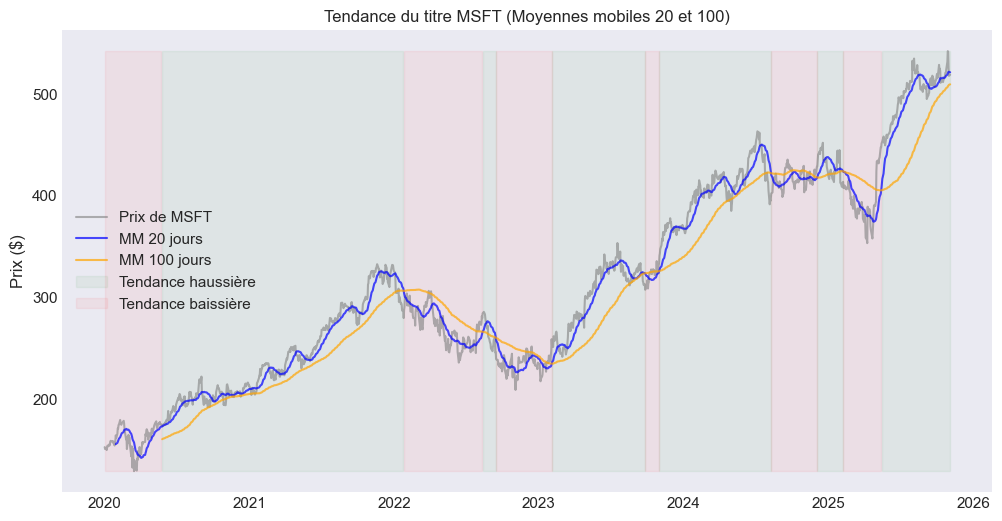

In [253]:
asset = "MSFT"  # choisir le titre à étudier
fill = True
small_window = 20
large_window = 100


small_ma = data[asset].rolling(small_window).mean()
large_ma = data[asset].rolling(large_window).mean()

plt.figure(figsize=(12, 6))
plt.plot(data[asset], label=f"Prix de {asset}", color="gray", alpha=0.6)
plt.plot(small_ma, label=f"MM {small_window} jours", color="blue", alpha=0.7)
plt.plot(large_ma, label=f"MM {large_window} jours", color="orange", alpha=0.7)

if fill : 
    trend_up = large_ma < small_ma  # True = tendance haussière
    # Colorer les zones de tendance
    plt.fill_between(data.index, data[asset].min(), data[asset].max(),
                    where=trend_up, color="green", alpha=0.05, label="Tendance haussière")
    plt.fill_between(data.index, data[asset].min(), data[asset].max(),
                    where=~trend_up, color="red", alpha=0.05, label="Tendance baissière")
plt.title(f"Tendance du titre {asset} (Moyennes mobiles {small_window} et {large_window})")
plt.ylabel("Prix ($)")
plt.legend()
plt.show()

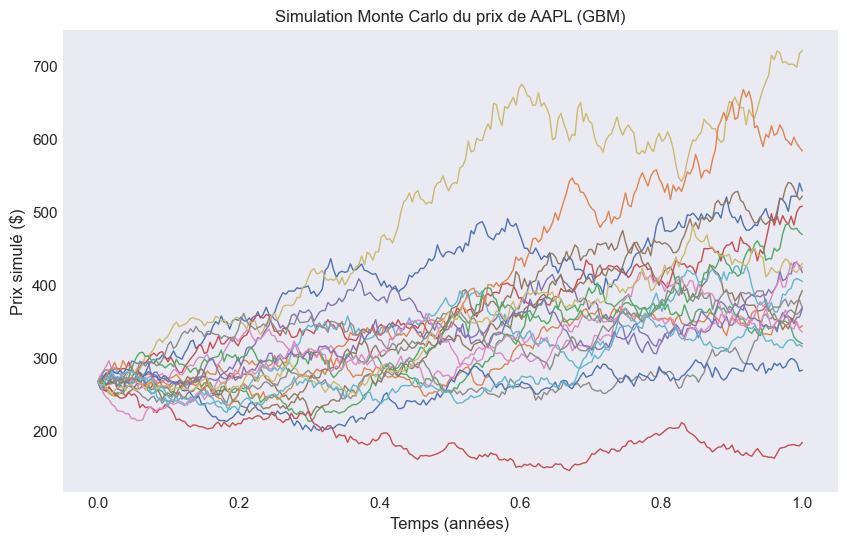

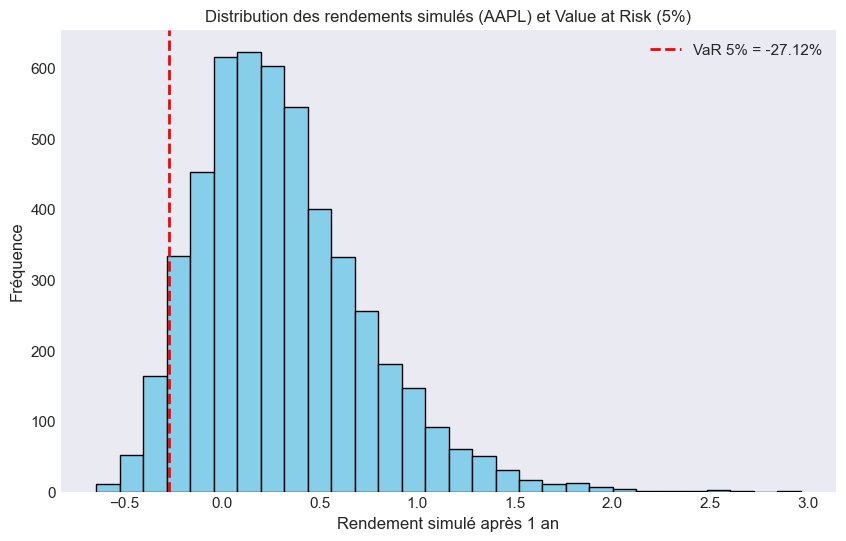

Value at Risk (5%) : -27.12%
Cela signifie qu'il y a 5% de chances que la perte dépasse 27.12% sur 1 an.


In [249]:
# On simule plusieurs chemins possibles pour le prix d'une action,
# selon le modèle de mouvement brownien géométrique (GBM) :
#
#   dS = μSdt + σSdz
#
# où :
#   μ = rendement attendu
#   σ = volatilité
#   dz = bruit aléatoire ~ N(0, √dt)
# =====================================================================

# Choisir une action de référence
asset = "AAPL"

# Paramètres à partir des données historiques
mu = returns[asset].mean() * trading_days        #type: ignore rendement annualisé
sigma = returns[asset].std() * np.sqrt(trading_days)  #type: ignore volatilité annualisée
S0 = data[asset].iloc[-1]  # dernier prix connu

# Paramètres de simulation
T = 1          # durée en années
N = 252        # pas de temps (jours de bourse)
dt = T / N     # intervalle de temps
n_paths = 5000   # nombre de trajectoires simulées

# Simulation
np.random.seed(42)
time = np.linspace(0, T, N)
paths = np.zeros((N, n_paths))
paths[0] = S0

for i in range(1, N):
    z = np.random.standard_normal(n_paths)
    paths[i] = paths[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Plot des trajectoires
plt.figure(figsize=(10, 6))
plt.plot(time, paths[:,:20], lw=1)
plt.title(f"Simulation Monte Carlo du prix de {asset} (GBM)")
plt.xlabel("Temps (années)")
plt.ylabel("Prix simulé ($)")
plt.show()

# Rendement final pour chaque trajectoire simulée
final_prices = paths[-1]
returns_simulated = (final_prices - S0) / S0
volatility_simulated = paths.transpose().std(axis=1)

# Calcul de la Value at Risk à 5%
alpha = 0.05
VaR_5 = np.percentile(returns_simulated, 100 * alpha)

# Plot de l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(returns_simulated, bins=30, color="skyblue", edgecolor="black")
plt.axvline(VaR_5, color="red", linestyle="--", linewidth=2, label=f"VaR 5% = {VaR_5:.2%}")
plt.title(f"Distribution des rendements simulés ({asset}) et Value at Risk (5%)")
plt.xlabel("Rendement simulé après 1 an")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

# Affichage du résultat
print(f"Value at Risk (5%) : {VaR_5:.2%}")
print(f"Cela signifie qu'il y a 5% de chances que la perte dépasse {abs(VaR_5):.2%} sur 1 an.")

Poids optimaux (Markowitz) :
  AAPL : 0.00%
  MSFT : 0.00%
  GOOG : 8.15%
  AMZN : 0.00%
  NVDA : 65.52%
  ORCL : 26.33%

Rendement : 61.21%
Volatilité : 42.30%
Sharpe Ratio : 1.45


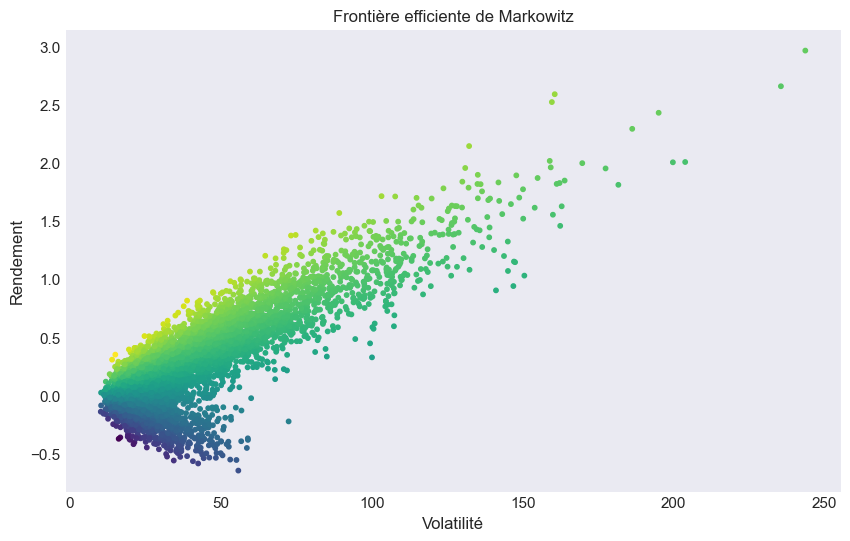

In [250]:
# Optimisation de portefeuille selon Markowitz
from scipy.optimize import minimize

def portfolio_perf(weights, mean_returns, cov_matrix):
    port_return = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_vol

def neg_sharpe(weights, mean_returns, cov_matrix, risk_free=0):
    r, v = portfolio_perf(weights, mean_returns, cov_matrix)
    return -(r - risk_free) / v

mean_returns = returns.mean() * trading_days
cov_matrix = returns.cov() * trading_days #type: ignore

# Contrainte : somme des poids = 1
constraints = {"type": "eq", "fun": lambda w: np.sum(w) - 1}
bounds = tuple((0, 1) for _ in range(len(tickers)))

result = minimize(neg_sharpe, len(tickers) * [1/len(tickers)], 
                  args=(mean_returns, cov_matrix),
                  method="SLSQP", bounds=bounds, constraints=constraints)

opt_weights = result.x
opt_return, opt_vol = portfolio_perf(opt_weights, mean_returns, cov_matrix)
opt_sharpe = opt_return / opt_vol

print("Poids optimaux (Markowitz) :")
for t, w in zip(tickers, opt_weights):
    print(f"  {t} : {w:.2%}")

print(f"\nRendement : {opt_return:.2%}")
print(f"Volatilité : {opt_vol:.2%}")
print(f"Sharpe Ratio : {opt_sharpe:.2f}")

portfolio_df = pd.DataFrame({
    "Rendement": returns_simulated,
    "Volatilité": volatility_simulated,
    "Sharpe": returns_simulated / volatility_simulated
})

# Visualisation du portefeuille optimal
plt.figure(figsize=(10,6))
plt.scatter(portfolio_df["Volatilité"], portfolio_df["Rendement"], 
            c=portfolio_df["Sharpe"], cmap="viridis", s=10)
plt.xlabel("Volatilité")
plt.ylabel("Rendement")
plt.title("Frontière efficiente de Markowitz")
plt.show()